In [1]:
#import libraries
#load data
#describe and understand data
#data cleansing 
#data statistical analysis 
#explanatory data analysis (charts,...)(EDA)
#data prepairation 
#model

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
#load data
Airline = pd.read_excel('Data_Train_Airline_Tickets.xlsx')
Airline

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## describe and understand data

In [4]:
Airline.shape

(10683, 11)

In [5]:
Airline2 = Airline.copy()
Airline2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
Airline2.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
Airline2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
Airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
Airline2.corr()

,Price
Price,1.0


## data cleansing 

In [10]:
Airline2=Airline2.dropna()

In [11]:
Airline2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
Airline2 = Airline2.drop_duplicates(keep = 'first')

In [13]:
sum(Airline2.duplicated())

0

In [14]:
Airline2.Total_Stops.replace({'non-stop':0 , '1 stop' : 1 , '2 stops' : 2 , '3 stops' : 3 , '4 stops': 4} , inplace = True)

In [15]:
Airline2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648


In [16]:
Airline2.drop(['Additional_Info'], axis = 1, inplace = True)

In [17]:
Airline2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,12648


In [18]:
Airline2.drop(['Route'], axis = 1, inplace = True)
Airline2

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,0,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648


In [19]:
Airline2['Duration_in_minutes'] = (pd.to_timedelta(Airline2['Duration']).dt.seconds // 60).astype(int)
Airline2

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Duration_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,325
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,285
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107,150
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,0,7229,180
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648,160


In [20]:
Airline2.drop(['Duration'], axis = 1, inplace = True)
Airline2

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,0,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,2,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1,6218,325
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,1,13302,285
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,0,4107,150
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,0,4145,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,0,7229,180
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,0,12648,160


## Data Correlation

In [21]:
Airline2.corr()

,Total_Stops,Price,Duration_in_minutes
Total_Stops,1.000000,0.602013,0.586422
Price,0.602013,1.000000,0.450547
Duration_in_minutes,0.586422,0.450547,1.000000


Text(0.5, 1, 'Matrix correlation')

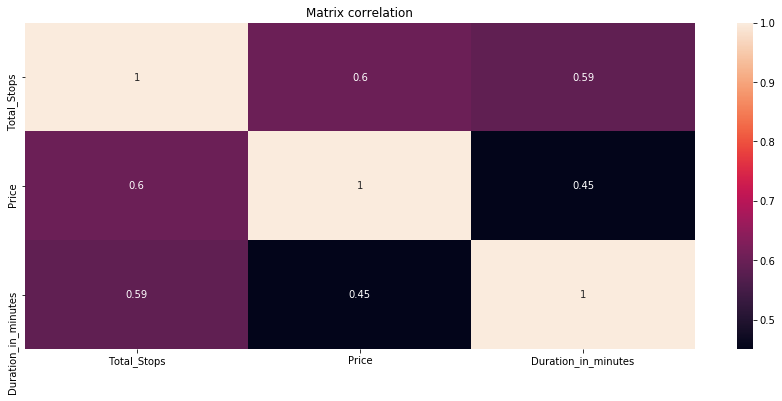

In [22]:
fig = plt.figure(figsize=(15,6))
sns.heatmap(Airline2.corr(), annot=True)
plt.title("Matrix correlation")

In [23]:
Airline2['Month'] = pd.DatetimeIndex(Airline2['Date_of_Journey']).month

In [24]:
Airline2

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_in_minutes,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,0,3897,170,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2,7662,445,1
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,2,13882,1140,9
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1,6218,325,12
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,1,13302,285,1
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,0,4107,150,9
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,0,4145,155,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,0,7229,180,4
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,0,12648,160,1


In [25]:
Airline2.corr()

,Total_Stops,Price,Duration_in_minutes,Month
Total_Stops,1.000000,0.602013,0.586422,0.065438
Price,0.602013,1.000000,0.450547,0.008662
Duration_in_minutes,0.586422,0.450547,1.000000,0.060408
Month,0.065438,0.008662,0.060408,1.000000


Text(0.5, 1, 'Matrix correlation')

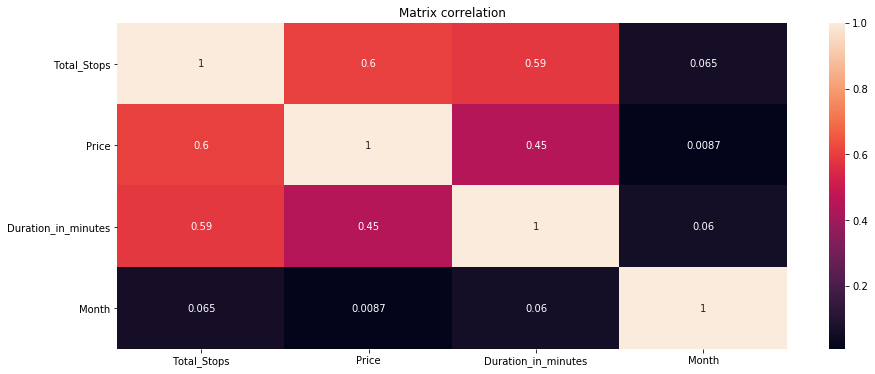

In [26]:
fig = plt.figure(figsize=(15,6))
sns.heatmap(Airline2.corr(), annot=True)
plt.title("Matrix correlation")

In [27]:
Airline2.drop(['Date_of_Journey'], axis = 1, inplace = True)
Airline2

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_in_minutes,Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,0,3897,170,3
1,Air India,Kolkata,Banglore,05:50,13:15,2,7662,445,1
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2,13882,1140,9
3,IndiGo,Kolkata,Banglore,18:05,23:30,1,6218,325,12
4,IndiGo,Banglore,New Delhi,16:50,21:35,1,13302,285,1
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,0,4107,150,9
10679,Air India,Kolkata,Banglore,20:45,23:20,0,4145,155,4
10680,Jet Airways,Banglore,Delhi,08:20,11:20,0,7229,180,4
10681,Vistara,Banglore,New Delhi,11:30,14:10,0,12648,160,1


In [28]:
Airline2.loc[Airline2['Dep_Time'] > "12:00", 'Dep_Time'] = 0
Airline2

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_in_minutes,Month
0,IndiGo,Banglore,New Delhi,0,01:10 22 Mar,0,3897,170,3
1,Air India,Kolkata,Banglore,05:50,13:15,2,7662,445,1
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2,13882,1140,9
3,IndiGo,Kolkata,Banglore,0,23:30,1,6218,325,12
4,IndiGo,Banglore,New Delhi,0,21:35,1,13302,285,1
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,22:25,0,4107,150,9
10679,Air India,Kolkata,Banglore,0,23:20,0,4145,155,4
10680,Jet Airways,Banglore,Delhi,08:20,11:20,0,7229,180,4
10681,Vistara,Banglore,New Delhi,11:30,14:10,0,12648,160,1


In [29]:
Airline2.loc[Airline2['Dep_Time'] != 0, 'Dep_Time'] = 1
Airline2

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_in_minutes,Month
0,IndiGo,Banglore,New Delhi,0,01:10 22 Mar,0,3897,170,3
1,Air India,Kolkata,Banglore,1,13:15,2,7662,445,1
2,Jet Airways,Delhi,Cochin,1,04:25 10 Jun,2,13882,1140,9
3,IndiGo,Kolkata,Banglore,0,23:30,1,6218,325,12
4,IndiGo,Banglore,New Delhi,0,21:35,1,13302,285,1
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,22:25,0,4107,150,9
10679,Air India,Kolkata,Banglore,0,23:20,0,4145,155,4
10680,Jet Airways,Banglore,Delhi,1,11:20,0,7229,180,4
10681,Vistara,Banglore,New Delhi,1,14:10,0,12648,160,1


In [30]:
Airline2.rename(columns = {'Dep_Time':'Dep_In_Morning'}, inplace = True)
Airline2

,Airline,Source,Destination,Dep_In_Morning,Arrival_Time,Total_Stops,Price,Duration_in_minutes,Month
0,IndiGo,Banglore,New Delhi,0,01:10 22 Mar,0,3897,170,3
1,Air India,Kolkata,Banglore,1,13:15,2,7662,445,1
2,Jet Airways,Delhi,Cochin,1,04:25 10 Jun,2,13882,1140,9
3,IndiGo,Kolkata,Banglore,0,23:30,1,6218,325,12
4,IndiGo,Banglore,New Delhi,0,21:35,1,13302,285,1
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,22:25,0,4107,150,9
10679,Air India,Kolkata,Banglore,0,23:20,0,4145,155,4
10680,Jet Airways,Banglore,Delhi,1,11:20,0,7229,180,4
10681,Vistara,Banglore,New Delhi,1,14:10,0,12648,160,1


In [31]:
Airline2['Dep_In_Morning'] = (Airline2['Dep_In_Morning']).astype(int)

In [32]:
Airline2.dtypes

Airline                object
Source                 object
Destination            object
Dep_In_Morning          int32
Arrival_Time           object
Total_Stops             int64
Price                   int64
Duration_in_minutes     int32
Month                   int64
dtype: object

In [33]:
Airline2.corr()

,Dep_In_Morning,Total_Stops,Price,Duration_in_minutes,Month
Dep_In_Morning,1.000000,0.065449,-0.005196,0.005601,-0.022138
Total_Stops,0.065449,1.000000,0.602013,0.586422,0.065438
Price,-0.005196,0.602013,1.000000,0.450547,0.008662
Duration_in_minutes,0.005601,0.586422,0.450547,1.000000,0.060408
Month,-0.022138,0.065438,0.008662,0.060408,1.000000


Text(0.5, 1, 'Matrix correlation')

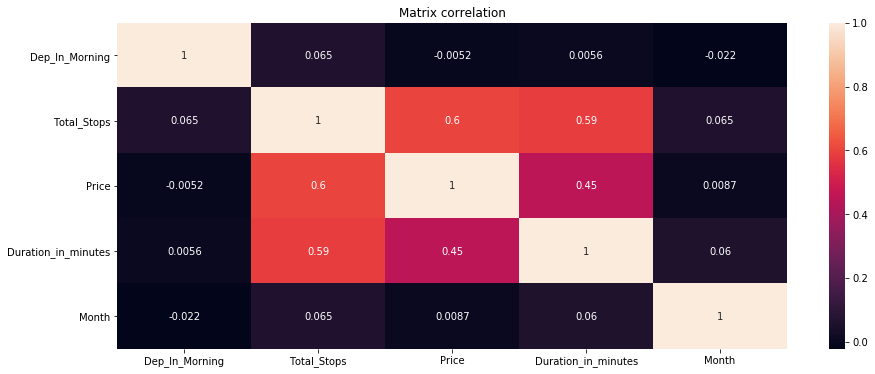

In [34]:
fig = plt.figure(figsize=(15,6))
sns.heatmap(Airline2.corr(), annot=True)
plt.title("Matrix correlation")

In [35]:
Airline2

,Airline,Source,Destination,Dep_In_Morning,Arrival_Time,Total_Stops,Price,Duration_in_minutes,Month
0,IndiGo,Banglore,New Delhi,0,01:10 22 Mar,0,3897,170,3
1,Air India,Kolkata,Banglore,1,13:15,2,7662,445,1
2,Jet Airways,Delhi,Cochin,1,04:25 10 Jun,2,13882,1140,9
3,IndiGo,Kolkata,Banglore,0,23:30,1,6218,325,12
4,IndiGo,Banglore,New Delhi,0,21:35,1,13302,285,1
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,22:25,0,4107,150,9
10679,Air India,Kolkata,Banglore,0,23:20,0,4145,155,4
10680,Jet Airways,Banglore,Delhi,1,11:20,0,7229,180,4
10681,Vistara,Banglore,New Delhi,1,14:10,0,12648,160,1


In [36]:
Airline2.drop(['Arrival_Time'], axis = 1, inplace = True)
Airline2

,Airline,Source,Destination,Dep_In_Morning,Total_Stops,Price,Duration_in_minutes,Month
0,IndiGo,Banglore,New Delhi,0,0,3897,170,3
1,Air India,Kolkata,Banglore,1,2,7662,445,1
2,Jet Airways,Delhi,Cochin,1,2,13882,1140,9
3,IndiGo,Kolkata,Banglore,0,1,6218,325,12
4,IndiGo,Banglore,New Delhi,0,1,13302,285,1
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,0,4107,150,9
10679,Air India,Kolkata,Banglore,0,0,4145,155,4
10680,Jet Airways,Banglore,Delhi,1,0,7229,180,4
10681,Vistara,Banglore,New Delhi,1,0,12648,160,1


## explanatory data analysis 

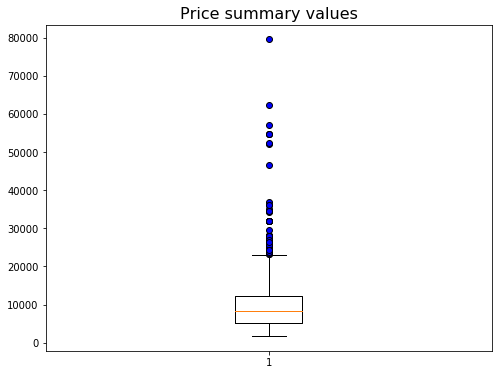

In [44]:
plt.figure(figsize=(8,6))
plt.boxplot(Airline2['Price'], flierprops=dict(markerfacecolor='b', marker='o'), showfliers=True, vert=True)
plt.title('Price summary values', size=16)
plt.show()

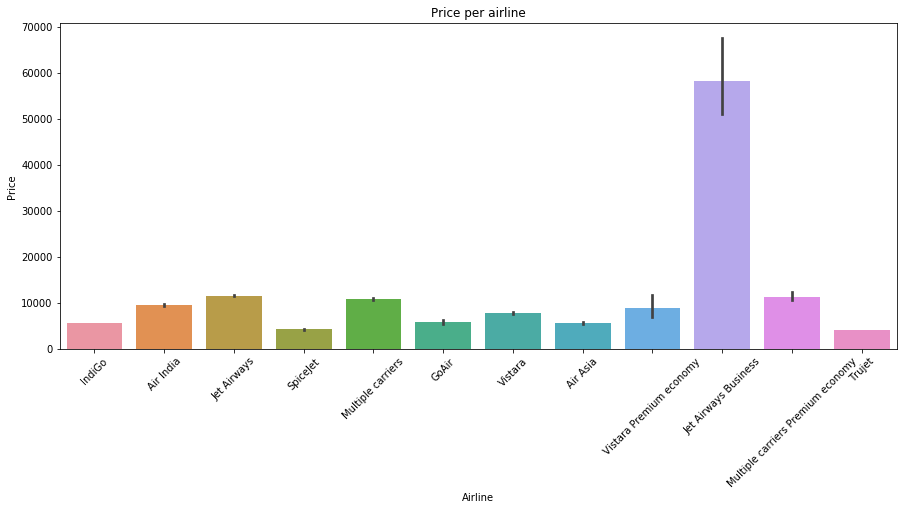

In [37]:
plt.figure(figsize = (15,6))
sns.barplot(data= Airline2 , x = 'Airline', y = 'Price')
plt.xticks(rotation = '45')
plt.title("Price per airline")
plt.show()

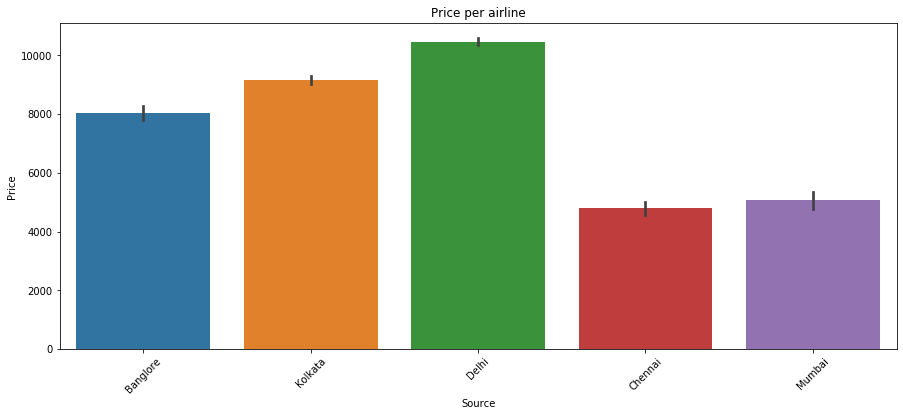

In [38]:
plt.figure(figsize = (15,6))
sns.barplot(data= Airline2 , x = 'Source', y = 'Price')
plt.xticks(rotation = '45')
plt.title("Price per airline")
plt.show()

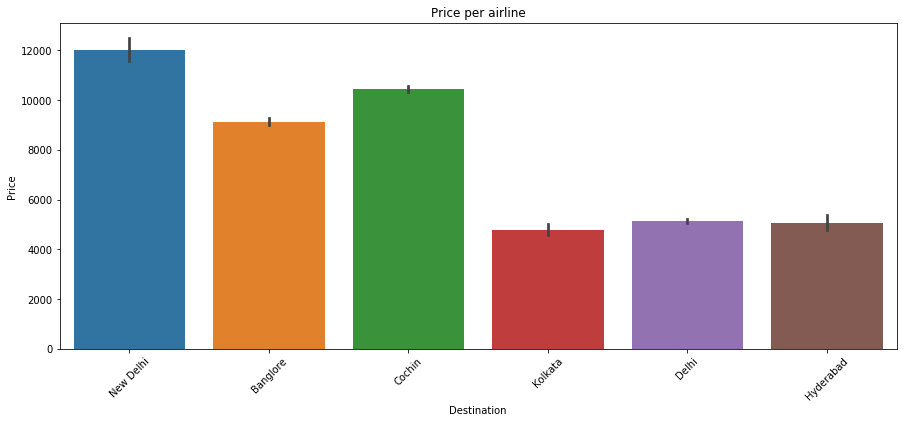

In [41]:
plt.figure(figsize = (15,6))
sns.barplot(data= Airline2 , x = 'Destination', y = 'Price')
plt.xticks(rotation = '45')
plt.title("Price per airline")
plt.show()

## Features Distribution

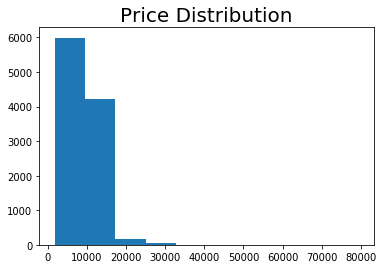

In [46]:
plt.hist(Airline2['Price'])
plt.title('Price Distribution', size=20)
plt.show()

In [47]:
Airline2.columns[Airline2.dtypes!='object']

Index(['Dep_In_Morning', 'Total_Stops', 'Price', 'Duration_in_minutes',
       'Month'],
      dtype='object')

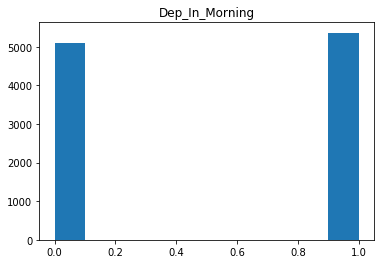

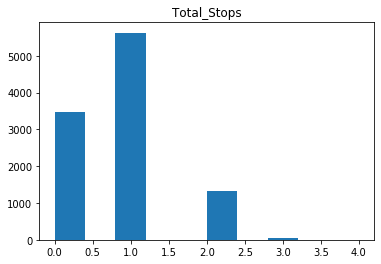

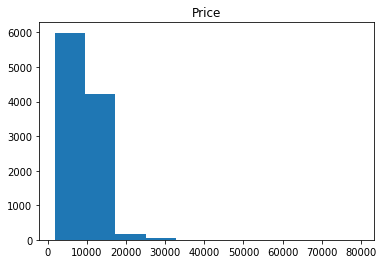

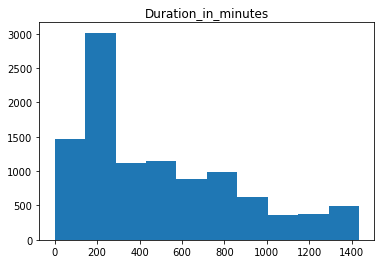

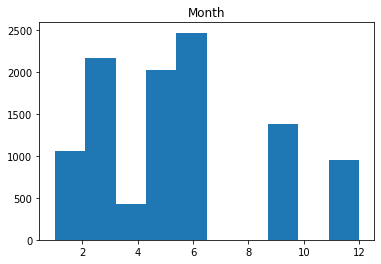

In [48]:
num_feature = Airline2.columns[Airline2.dtypes!='object']

def my_plot(feature):
    plt.hist(Airline2[feature])
    plt.title(feature)
    plt.show()
        
for i in num_feature:
    my_plot(i)

## Categorical Features Transformation

In [54]:
tra_Airline2 = Airline2.select_dtypes(include=['object'])

In [55]:
tra_Airline2.head()

,Airline,Source,Destination
0,IndiGo,Banglore,New Delhi
1,Air India,Kolkata,Banglore
2,Jet Airways,Delhi,Cochin
3,IndiGo,Kolkata,Banglore
4,IndiGo,Banglore,New Delhi


In [56]:
pd.get_dummies(tra_Airline2).columns  #drop_first=True

Index(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [57]:
Airline2_clear = pd.get_dummies(tra_Airline2, drop_first=True)

In [58]:
Airline2_clear.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
Airline2_clear = pd.get_dummies(Airline2, drop_first=True)

In [60]:
Airline2_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Dep_In_Morning                             10462 non-null  int32
 1   Total_Stops                                10462 non-null  int64
 2   Price                                      10462 non-null  int64
 3   Duration_in_minutes                        10462 non-null  int32
 4   Month                                      10462 non-null  int64
 5   Airline_Air India                          10462 non-null  uint8
 6   Airline_GoAir                              10462 non-null  uint8
 7   Airline_IndiGo                             10462 non-null  uint8
 8   Airline_Jet Airways                        10462 non-null  uint8
 9   Airline_Jet Airways Business               10462 non-null  uint8
 10  Airline_Multiple carriers                  104

In [61]:
Airline2_clear.head()

,Dep_In_Morning,Total_Stops,Price,Duration_in_minutes,Month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,3897,170,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2,7662,445,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2,13882,1140,9,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1,6218,325,12,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,13302,285,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Divide Data into Train & Test

In [98]:
x = Airline2_clear.drop('Price', axis=1)
y = pd.DataFrame(Airline2_clear['Price'])

In [99]:
x.head()

,Dep_In_Morning,Total_Stops,Duration_in_minutes,Month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,170,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2,445,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2,1140,9,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1,325,12,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,285,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [102]:
print(x_train.shape)
x_train.head()

(8369, 24)


,Dep_In_Morning,Total_Stops,Duration_in_minutes,Month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
7187,0,1,1430,5,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7086,0,1,1210,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8795,1,1,465,5,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1168,1,1,270,3,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6988,0,1,1255,12,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [103]:
print(y_train.shape)
y_train.head()

(8369, 1)


,Price
7187,10844
7086,12898
8795,9254
1168,9806
6988,7480


In [104]:
x_test.shape, y_test.shape

((2093, 24), (2093, 1))

## Numerical Features Scaling

In [105]:
scaler_x = MinMaxScaler().fit(x_train)
scaler_y = MinMaxScaler().fit(y_train)

In [106]:
x_train_sc = scaler_x.transform(x_train)
x_test_sc = scaler_x.transform(x_test)

In [107]:
y_train_sc = scaler_y.transform(y_train)
y_test_sc = scaler_y.transform(y_test)

In [108]:
y_train

,Price
7187,10844
7086,12898
8795,9254
1168,9806
6988,7480
...,...
9387,6241
4910,7006
3291,3597
10034,10262


In [109]:
y_train_sc

array([[0.11684437],
       [0.14326135],
       [0.09639499],
       ...,
       [0.02363896],
       [0.10935912],
       [0.07927668]])

## Apply Linear Regression

In [110]:
lr_model = LinearRegression()
lr_model.fit(x_train_sc, y_train_sc)
y_pred_sc = lr_model.predict(x_test_sc)

In [111]:
y_test_sc

array([[0.14382725],
       [0.04918138],
       [0.16477821],
       ...,
       [0.10935912],
       [0.14047046],
       [0.13536455]])

In [112]:
y_pred_sc

array([[0.10006212],
       [0.06675136],
       [0.1278177 ],
       ...,
       [0.12744227],
       [0.13088389],
       [0.15752728]])

In [113]:
mae = mean_absolute_error(y_test_sc, y_pred_sc)
rmse = np.sqrt(mean_squared_error(y_test_sc, y_pred_sc))

print('MAE = ', mae.round(4))
print('RMSE = ', rmse.round(4))

MAE =  0.0256
RMSE =  0.0389


In [114]:
y_test_inv = scaler_y.inverse_transform(y_test_sc.reshape(-1,1))
y_pred_inv = scaler_y.inverse_transform(y_pred_sc.reshape(-1,1))

actual_mae = mean_absolute_error(y_test_inv, y_pred_inv)
actual_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print('Actual MAE = ', int(actual_mae))
print('Actual RMSE = ', int(actual_rmse))

Actual MAE =  1992
Actual RMSE =  3022


In [115]:
y_test_inv

array([[12942.],
       [ 5583.],
       [14571.],
       ...,
       [10262.],
       [12681.],
       [12284.]])

In [116]:
y_pred_inv

array([[ 9539.12995854],
       [ 6949.1186663 ],
       [11697.20966103],
       ...,
       [11668.01853295],
       [11935.61491384],
       [14007.21876877]])